In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'C:/Users/Edz/Desktop/Potato/Potato/Train'
data_test_path = 'C:/Users/Edz/Desktop/Potato/Potato/Test'
data_val_path = 'C:/Users/Edz/Desktop/Potato/Potato/Valid'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 900 files belonging to 3 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 300 files belonging to 3 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 300 files belonging to 3 classes.


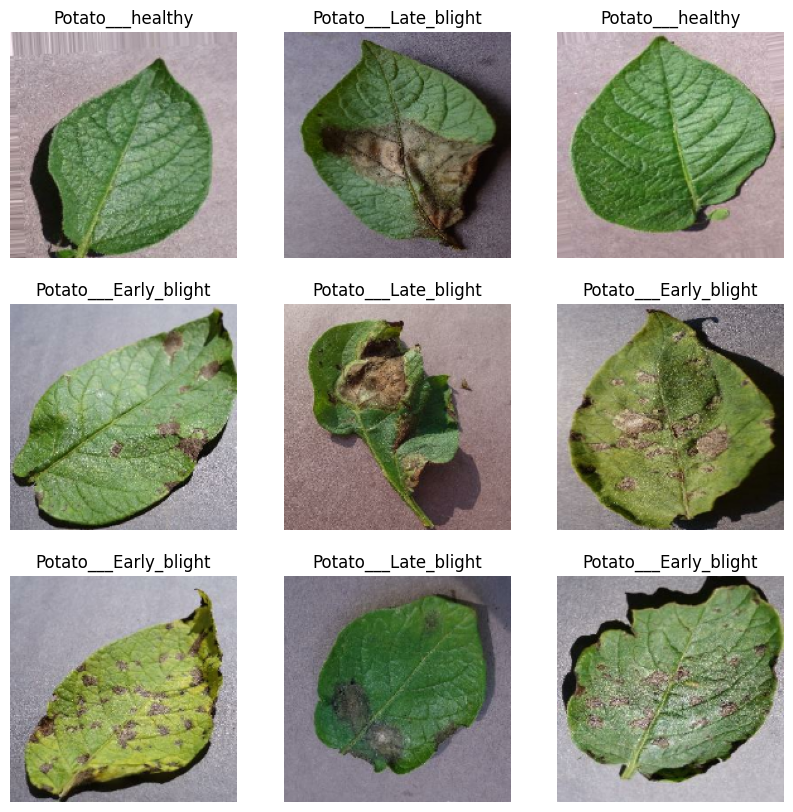

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
29/29 [==============================] - 34s 1s/step - loss: 1.5840 - accuracy: 0.4511 - val_loss: 0.8385 - val_accuracy: 0.6433
Epoch 2/25
29/29 [==============================] - 29s 996ms/step - loss: 0.6146 - accuracy: 0.7389 - val_loss: 0.5438 - val_accuracy: 0.7367
Epoch 3/25
29/29 [==============================] - 26s 891ms/step - loss: 0.3416 - accuracy: 0.8544 - val_loss: 0.3280 - val_accuracy: 0.8667
Epoch 4/25
29/29 [==============================] - 27s 943ms/step - loss: 0.1656 - accuracy: 0.9467 - val_loss: 0.2119 - val_accuracy: 0.9200
Epoch 5/25
29/29 [==============================] - 32s 1s/step - loss: 0.0784 - accuracy: 0.9789 - val_loss: 0.3061 - val_accuracy: 0.8733
Epoch 6/25
29/29 [==============================] - 27s 913ms/step - loss: 0.0752 - accuracy: 0.9722 - val_loss: 0.6189 - val_accuracy: 0.8067
Epoch 7/25
29/29 [==============================] - 26s 897ms/step - loss: 0.1803 - accuracy: 0.9222 - val_loss: 0.1933 - val_accuracy: 0.9300
Epoch

Text(0.5, 1.0, 'Loss')

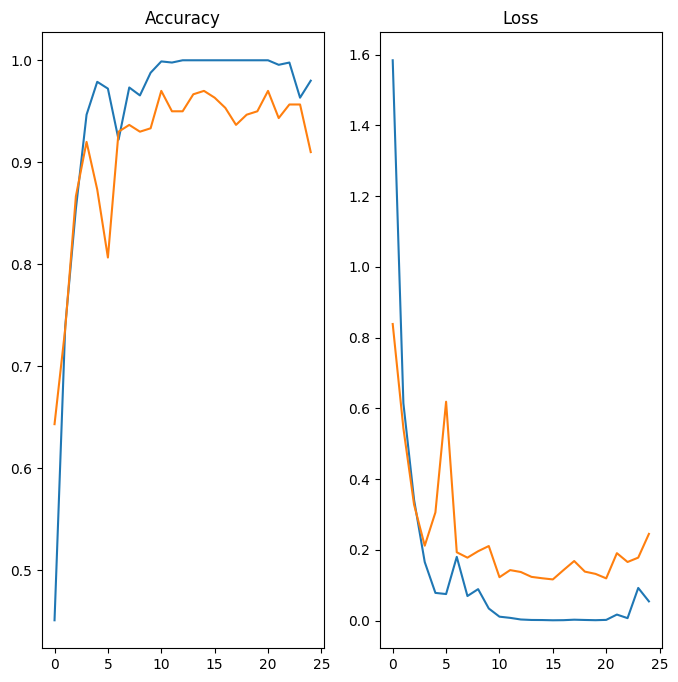

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [16]:
image = 'sample.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [17]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 446ms/step


In [18]:
score = tf.nn.softmax(predict)

In [19]:
print('Patato Image {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Patato Image Potato___Early_blight with accuracy of 100.00


In [20]:
model.save('Image_classify.keras')